# analysis

> Looking at outliers in terms of num_strokes, num_points.

In [ ]:
#| default_exp analysis

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import os

import numpy as np

from singleline_stroke3.dataset import *
from singleline_stroke3.display import *
from singleline_stroke3.strokes import *
from singleline_stroke3.svg import *
from singleline_stroke3.transforms import *

## Full Runs

### Dataset V1

- `epsilon=1.0`
- No max stroke threshold

In [ ]:
## first dataset

# full_dataset = svgs_to_deltas('../../svg-dataset/sketch_mgmt/imgs_sorted/drawings_svg_cropped/', '../outputs', limit=None)
# np.savez('../datasets/v1-splice.npz', full_dataset, encoding='latin1', allow_pickle=True)

## Dataset V2

- `epsilon=0.5`
- `max_stroke={5,6}`

In [ ]:
# ## second dataset

# %%time

# full_dataset_eps05 = svgs_to_deltas(
#     "../../svg-dataset/sketch_mgmt/imgs_sorted/drawings_svg_cropped/",
#     "../outputs_segmented",
#     epsilon=0.5,
#     limit=None,
# )

# print("-" * 50)
# print(len(full_dataset_eps05))
# print("-" * 50)
# np.savez(
#     "../datasets/v2-splice-eps05-j15-s40.npz",
#     full_dataset_eps05,
#     encoding="latin1",
#     allow_pickle=True,
# )

In [ ]:
full_dataset = svgs_to_deltas(
    singleline_data_home() / "svg/epoch-20231214/0_drawings",
    singleline_data_home() / "stroke3/epoch-20231214/0_drawings",
    epsilon=1.0,
    limit=None,
)

In [ ]:
np.savez(
    singleline_data_home() / "stroke3/epoch-20231214//full-v2-eps10.npz",
    full_dataset,
    encoding="latin1",
    allow_pickle=True,
)

Analysis: choosing max stroke threshold, to filter out drawings with too much complexity.

In [ ]:
full_dataset = np.load(
    singleline_data_home() / "stroke3/epoch-20231214//full-v2-eps10.npz",
    encoding="latin1",
    allow_pickle=True,
)["arr_0"]
len(full_dataset)

df = stroke_summary_df(full_dataset)
df.head()

,idx,num_points,num_strokes
0,0,246,5
1,1,172,4
2,2,306,4
3,3,213,3
4,4,35,4


<Axes: >

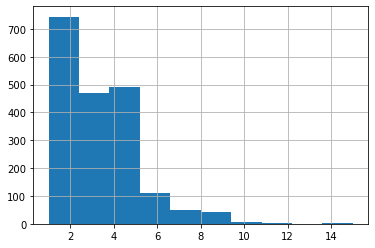

In [ ]:
df.num_strokes.hist()

**TODO:**
- map order of TSV/DF to order of dataset (or of full dataset file)

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[0]))

In [ ]:
s0 = deltas_to_strokes(full_dataset[0])

In [ ]:
# s0

In [ ]:
BoundingBox.create(s0[0])

BoundingBox(xmin=0.08096411158316241, xmax=69.44714708744047, xrange=69.36618297585731, ymin=0.0, ymax=113.62674388441751, yrange=113.62674388441751)

In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt


def plot_strokes_bb(strokes, target_size=200, lw=2, fname=None):
    fig = plt.figure()
    ax = plt.axes(
        xlim=(0, target_size + 0.1 * target_size),
        ylim=(-target_size - 0.1 * target_size),
    )
    ax.set_facecolor("white")
    
    # # remove the axis
    # ax.grid = False
    # ax.set_xticks([])
    # ax.set_yticks([])

    # remove the frame; https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-a-figure
    fig.patch.set_visible(False)
    # plt.box(False)

    lines = []
    for s in strokes:
        (line,) = ax.plot([], [], lw=lw)
        line.set_data(s[:, 0], -s[:, 1])
        lines.append(line)
        bb = BoundingBox.create(s)
        rect = patches.Rectangle(
            (bb.xmin, -bb.ymin),
            bb.xrange,
            -bb.yrange,
            linewidth=1,
            edgecolor="g",
            facecolor="none",
        )
        # Add the patch to the Axes
        ax.add_patch(rect)

    if not fname:
        plt.show()
        return
    with io.BytesIO() as buf:
        plt.savefig(buf, format="png")
        plt.close()
        img = Image.open(buf)
        img.save(fname)
        buf.seek(0)
        buf.truncate()

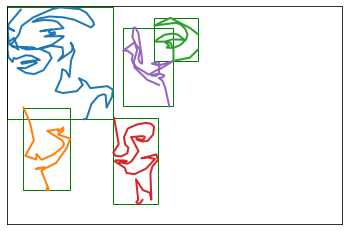

In [ ]:
plot_strokes_bb(s0)

In [ ]:
s00 = s0[0]
s01 = s0[1]
s02 = s0[2]
s03 = s0[3]
s04 = s0[4]

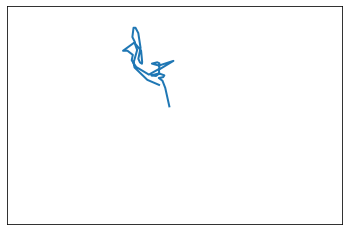

In [ ]:
plot_strokes([s04])

In [ ]:
bb1 = BoundingBox.create(s02)
bb2 = BoundingBox.create(s04)

In [ ]:
bb1

BoundingBox(xmin=96.63026729741347, xmax=125.19782419420726, xrange=28.56755689679379, ymin=10.718543770600853, ymax=54.38382939025482, yrange=43.665285619653964)

In [ ]:
bb2

BoundingBox(xmin=76.1019055995039, xmax=109.21657860962235, xrange=33.11467301011845, ymin=20.73623921702644, ymax=100.64026618156714, yrange=79.9040269645407)

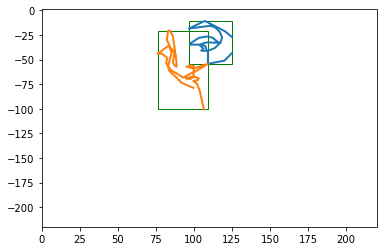

In [ ]:
plot_strokes_bb([s02, s04])

<matplotlib.patches.Rectangle>

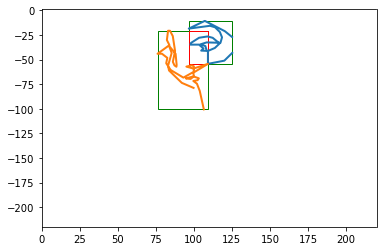

In [ ]:
strokes = [s02, s04]
lw=2

target_size=200

fig = plt.figure()
ax = plt.axes(
    xlim=(0, target_size + 0.1 * target_size),
    ylim=(-target_size - 0.1 * target_size),
)
ax.set_facecolor("white")

# # remove the axis
# ax.grid = False
# ax.set_xticks([])
# ax.set_yticks([])

# remove the frame; https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-a-figure
fig.patch.set_visible(False)
# plt.box(False)

lines = []
for s in strokes:
    (line,) = ax.plot([], [], lw=lw)
    line.set_data(s[:, 0], -s[:, 1])
    lines.append(line)
    bb = BoundingBox.create(s)
    rect = patches.Rectangle(
        (bb.xmin, -bb.ymin),
        bb.xrange,
        -bb.yrange,
        linewidth=1,
        edgecolor="g",
        facecolor="none",
    )
    ax.add_patch(rect)

rect = patches.Rectangle(
    (x_left, -y_top),
    x_right - x_left,
    -(y_bottom - y_top),
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
# Add the patch to the Axes
ax.add_patch(rect)

423.49904482587266

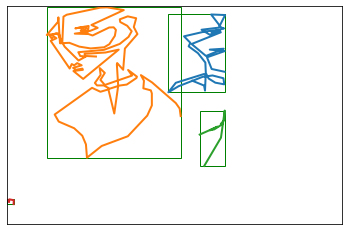

In [ ]:
plot_strokes_bb(deltas_to_strokes(full_dataset[1]))

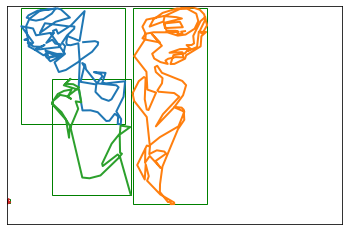

In [ ]:
plot_strokes_bb(deltas_to_strokes(full_dataset[2]))

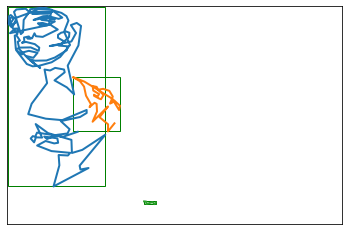

In [ ]:
plot_strokes_bb(deltas_to_strokes(full_dataset[3]))

In [ ]:
# from https://stackoverflow.com/a/42874377
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1["x1"] < bb1["x2"]
    assert bb1["y1"] < bb1["y2"]
    assert bb2["x1"] < bb2["x2"]
    assert bb2["y1"] < bb2["y2"]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1["x1"], bb2["x1"])
    y_top = max(bb1["y1"], bb2["y1"])
    x_right = min(bb1["x2"], bb2["x2"])
    y_bottom = min(bb1["y2"], bb2["y2"])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1["x2"] - bb1["x1"]) * (bb1["y2"] - bb1["y1"])
    bb2_area = (bb2["x2"] - bb2["x1"]) * (bb2["y2"] - bb2["y1"])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
s3 = deltas_to_strokes(full_dataset[3])

In [ ]:
len(s3)

3

In [ ]:
def _convert(bb):
    return {
        "x1": bb.xmin,
        "x2": bb.xmax,
        "y1": bb.ymin,
        "y2": bb.ymax,
    }

In [ ]:
b30 = _convert(BoundingBox.create(s3[0]))
b31 = _convert(BoundingBox.create(s3[1]))
b32 = _convert(BoundingBox.create(s3[2]))

In [ ]:
get_iou(b30, b31), get_iou(b30, b32), get_iou(b31, b32)

(0.0963479210930691, 0.0, 0.0)

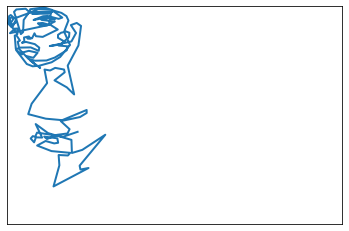

In [ ]:
plot_strokes([s3[0]])

In [ ]:
bb0 = BoundingBox.create(s3[0])
bb0.xrange * bb0.yrange

11643.129358258766

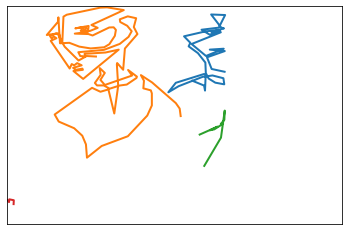

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[1]))

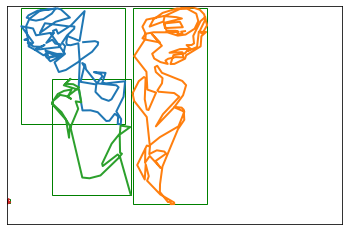

In [ ]:
plot_strokes_bb(deltas_to_strokes(full_dataset[2]))

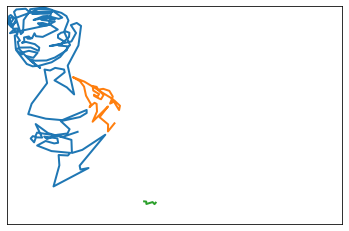

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[3]))

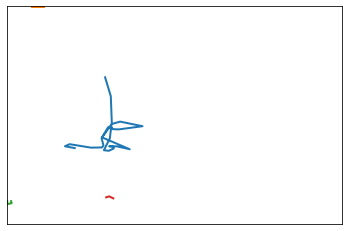

In [ ]:
# plot_strokes(deltas_to_strokes(full_dataset[4]))

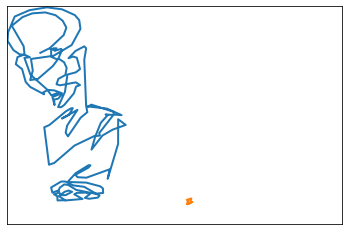

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[5]))

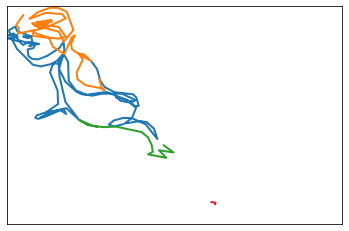

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[6]))

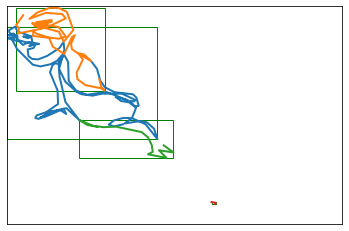

In [ ]:
plot_strokes_bb(deltas_to_strokes(full_dataset[6]))

In [ ]:
for i in range(10):
    print(i, len(df[df.num_strokes <= i]))

0 0
1 196
2 639
3 1037
4 1333
5 1462
6 1547
7 1607
8 1628
9 1639


## Chop Dataset into Train/Val

In [ ]:
# d6 = df[df.num_strokes <= 6].sample(frac=1)
# train_size = int(len(d6) * 0.8 / 100) * 100
# val_size = len(d6) - train_size
# print(train_size, val_size, len(d6))

# d6_train = full_dataset[list(d6[:train_size].idx)]
# d6_val = full_dataset[list(d6[train_size:].idx)]
# print(len(d6_train), len(d6_val))

# np.savez(
#     "v2-splice-maxstrokes6.npz",
#     train=d6_train,
#     valid=d6_val,
#     test=d6_val,
#     encoding="latin1",
#     allow_pickle=True,
# )

1200 347 1547
1200 347


(1200, 347)

<Axes: >

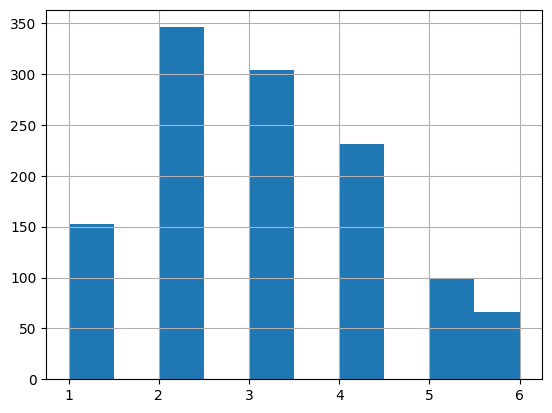

In [ ]:
# import pandas as pd

# d6_summary = [
#     {"idx": i, "num_points": len(deltas), "num_strokes": len(deltas_to_strokes(deltas))}
#     for i, deltas in enumerate(d6_train)
# ]
# d6df = pd.DataFrame(d6_summary)
# d6df.num_strokes.hist()

In [ ]:
# d5 = df[df.num_strokes <= 5].sample(frac=1)
# train_size = int(len(d5) * 0.8 / 100) * 100
# val_size = len(d5) - train_size
# print(train_size, val_size, len(d5))

# d5_train = full_dataset[list(d5[:1200].idx)]
# d5_val = full_dataset[list(d5[1200:].idx)]
# print(len(d5_train), len(d5_val))

# np.savez(
#     "v2-splice-maxstrokes5.npz",
#     train=d5_train,
#     valid=d5_val,
#     test=d5_val,
#     encoding="latin1",
#     allow_pickle=True,
# )

1100 362 1462
1200 262


## Inspect edge cases

<Axes: >

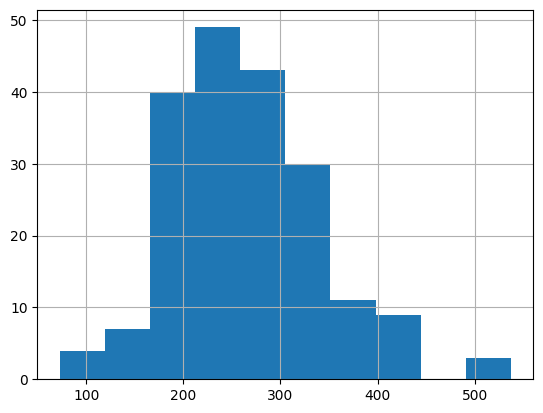

In [ ]:
# df[df.num_strokes <= 2].num_points.hist()

In [ ]:
# df[df.num_strokes <= 2].iloc[:5]

,idx,num_points,num_strokes
1455,0,177,2
1456,5,252,2
1457,12,236,2
1458,28,387,2
1459,35,303,2


In [ ]:
# df[df.num_strokes <= 2].iloc[:5]

idx              0
num_points     177
num_strokes      2
Name: 1455, dtype: int64


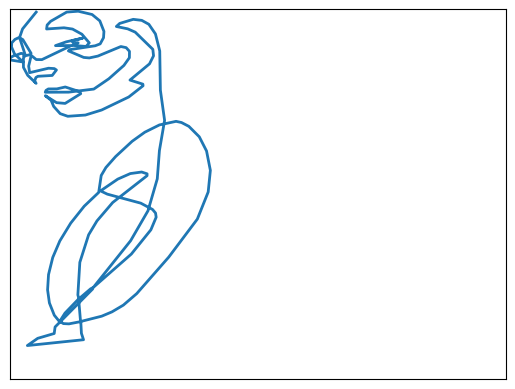

idx              5
num_points     252
num_strokes      2
Name: 1456, dtype: int64


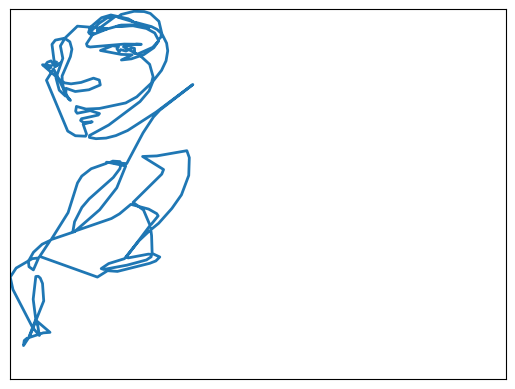

idx             12
num_points     236
num_strokes      2
Name: 1457, dtype: int64


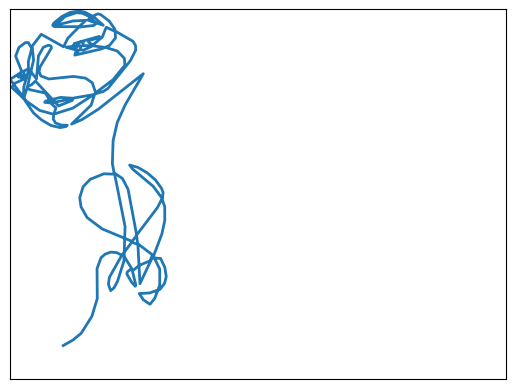

idx             28
num_points     387
num_strokes      2
Name: 1458, dtype: int64


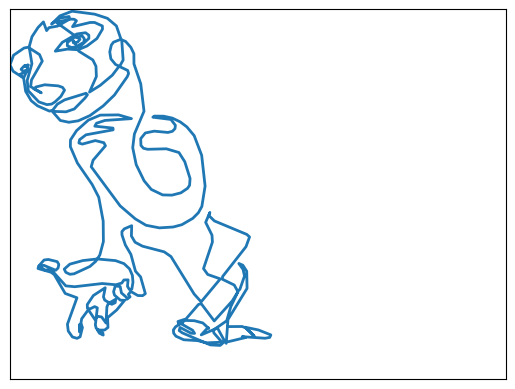

idx             35
num_points     303
num_strokes      2
Name: 1459, dtype: int64


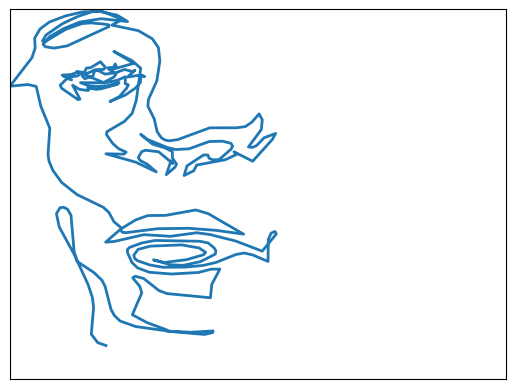

In [ ]:
# for i in range(5):
#     row = df[df.num_strokes <= 2].iloc[i]
#     print(row)
#     plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

In [ ]:
# tmp = full_dataset[row.idx]

In [ ]:
# tmp1 = deltas_to_strokes(tmp)

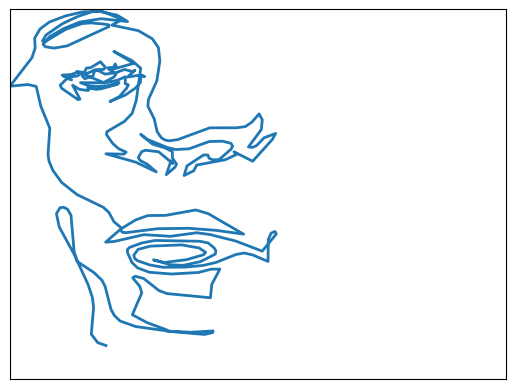

In [ ]:
# plot_strokes(tmp1)

In [ ]:
# tmp1 = [s for s in deltas_to_strokes(tmp) if len(s) > 0]

# strokes_to_deltas(rdp_strokes(tmp1, epsilon=1.1)).shape

(194, 3)

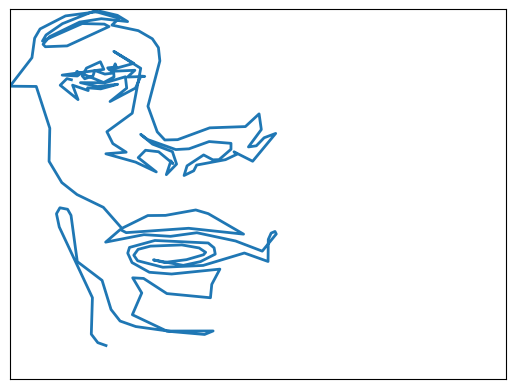

In [ ]:
# plot_strokes(rdp_strokes(tmp1, epsilon=1.1))

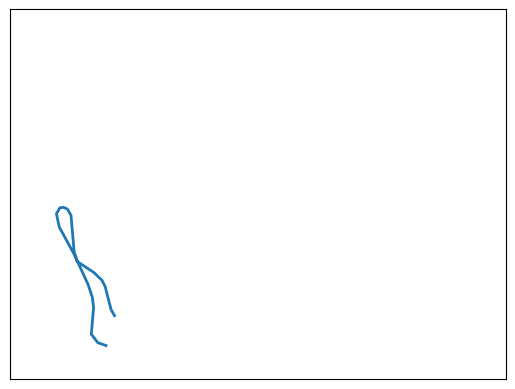

In [ ]:
# import numpy as np

# max_seq_len = 20
# overflow = len(tmp) - max_seq_len
# rand_offset = int(np.random.rand() * overflow)
# overflow, rand_offset
# rand_offset = 0
# plot_strokes(deltas_to_strokes(tmp[rand_offset : rand_offset + max_seq_len]))

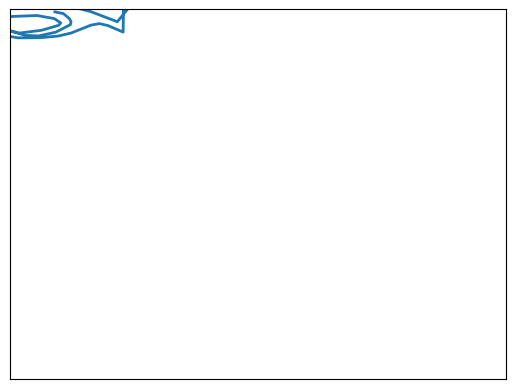

<Axes: >

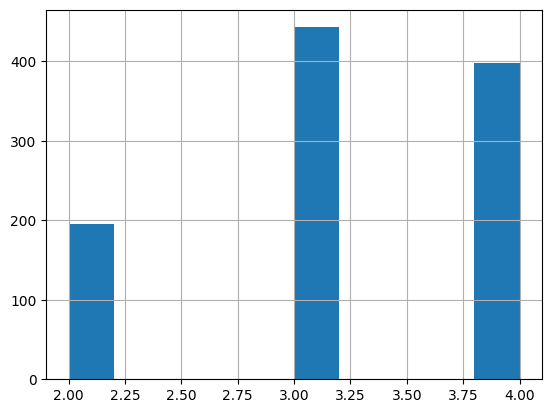

In [ ]:
# df[df.num_strokes < 5].sample(frac=1).num_strokes.hist()

In [ ]:
# len(df[df.num_strokes == 6])

129

In [ ]:
# for i in range(5):
#     row = df[df.num_strokes == 6].iloc[i]
#     print(row)
#     plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

In [ ]:
# for entry in by_num_strokes[10:20]:
#     idx, num_points, num_strokes = entry
#     plot_strokes(deltas_to_strokes(full_dataset[idx]))

## Find shortest strokes

In [ ]:
# len(df[df.num_strokes == 4])

310

In [ ]:
# for idx in range(len(df[df.num_strokes <= 4])):
#     print(idx)

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()